Samantha M. Garcia
Data Management & Analysis
Assignment 4

Dataset: Brooklyn Bridge Automated Pedestrian Counts Demonstration Project
Source: NYC Open data
https://data.cityofnewyork.us/Transportation/Brooklyn-Bridge-Automated-Pedestrian-Counts-Demons/6fi9-q3ta

The Department of Transit used automated technology to count the number of pedestrians on the Brooklyn Bridge. This dataset holds records of the number of people, the direction they were heading (to Brooklyn or Manhattan), the weather, precipitation, date & time, and exact location.

I'm not sure what I'd like to do with this data. It would be interesting to look at which direction people most frequently walk, however it is likely that people walk one way and then walk back, so it is possible that people are double counted

In [1]:
import pandas as pd
import datetime as dt

In [2]:
file = "/Users/samanthagarcia/Desktop/dm&a4/Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project.csv"

df = pd.read_csv(file)

df

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,11/12/2017 06:00:00 AM,Brooklyn Bridge,38,23,15,clear-night,30.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,11/29/2017 01:00:00 AM,Brooklyn Bridge,11,7,4,clear-night,48.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/17/2017 10:00:00 PM,Brooklyn Bridge,168,99,69,partly-cloudy-night,35.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,11/10/2017 12:00:00 PM,Brooklyn Bridge,1213,506,707,clear-day,36.0,0.0001,40.708164,-73.999509,Veterans Day observed,"(40.7081639691088, -73.9995087014816)"
4,01/24/2018 11:00:00 AM,Brooklyn Bridge,535,298,237,partly-cloudy-day,40.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
...,...,...,...,...,...,...,...,...,...,...,...,...
7291,06/22/2018 04:00:00 AM,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
7292,07/19/2018 06:00:00 AM,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
7293,06/16/2018 04:00:00 PM,Brooklyn Bridge,2623,1161,1462,clear-day,82.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
7294,07/24/2018 06:00:00 PM,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


## value_counts()

In [3]:
print(df["lat"].value_counts()) #latitudinal position
print(df["long"].value_counts()) #longitudinal position
print(df["Location1"].value_counts()) #coordinates
print(df["location"].value_counts()) #Brooklyn Bridge

40.708164    7296
Name: lat, dtype: int64
-73.999509    7296
Name: long, dtype: int64
(40.7081639691088, -73.9995087014816)    7296
Name: Location1, dtype: int64
Brooklyn Bridge    7296
Name: location, dtype: int64


In the description, it states that the automated counting device is located on the Manhattan approach of the Brooklyn Bridge. It makes sense that the latitudinal and longitudinal positions are all the same because the people were all counted in the same place because the device doesn't move... These columns seem unnecessary, so I will remove them.

## removing some columns

In [4]:
df = df.drop("lat", axis=1)
df = df.drop("long", axis=1)
df = df.drop("Location1", axis=1)
df = df.drop("location", axis=1)

## transforming a column

In [5]:
df["hour_beginning"]

0       11/12/2017 06:00:00 AM
1       11/29/2017 01:00:00 AM
2       12/17/2017 10:00:00 PM
3       11/10/2017 12:00:00 PM
4       01/24/2018 11:00:00 AM
                 ...          
7291    06/22/2018 04:00:00 AM
7292    07/19/2018 06:00:00 AM
7293    06/16/2018 04:00:00 PM
7294    07/24/2018 06:00:00 PM
7295    07/23/2018 12:00:00 AM
Name: hour_beginning, Length: 7296, dtype: object

I'm going to split the "hour_beginning" column into date & hour

In [6]:
df[["date", "time"]] = df.hour_beginning.str.split(" ", n=1, expand=True)
df = df.drop("hour_beginning", axis=1)

## type conversion

In [7]:
df.dtypes

Pedestrians            int64
Towards Manhattan      int64
Towards Brooklyn       int64
weather_summary       object
temperature          float64
precipitation        float64
events                object
date                  object
time                  object
dtype: object

In [8]:
df["date"] = pd.to_datetime(df["date"])

## visualization

In [9]:
maximum = df["Pedestrians"].max()
minimum = df["Pedestrians"].min()
mean = df["Pedestrians"].mean()

months = df.groupby(df["date"].dt.month).size()
print(months)

date
1     744
2     672
3     744
4     720
5     744
6     720
7     744
10    744
11    720
12    744
dtype: int64


In [10]:
import matplotlib.pyplot as plt

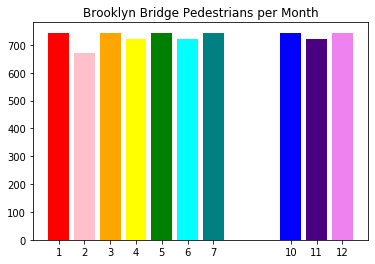

In [11]:
x = months.index
height = months.values
colors = ["red", "pink", "orange", "yellow", "green", "cyan", "teal", "blue", "indigo", "violet"]

plt.title("Brooklyn Bridge Pedestrians per Month")
plt.bar(x, height, color=colors, tick_label=x)
plt.show()